<a href="https://colab.research.google.com/github/younstrades-coder/Quant_Market_Research/blob/main/Geometry_of_Risk_Global_Market_Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Geometry of Risk – A Spectral Decomposition of Global Markets

This analysis applies Linear Algebra (Eigen-Decomposition) and Network Theory to decode the hidden structure of the global financial system in the 2025 macro regime. By leveraging Principal Component Analysis (PCA) to isolate "Global Beta" and PageRank (Eigenvector Centrality) to map systemic transmission hubs, we move beyond standard correlation matrices to visualize the true connectivity of risk. The study culminates in a rolling Absorption Ratio, providing a quantitative signal for market fragility and the breakdown of cross-asset diversification.

# Global Markets

We will use Eigenvalues to measure the "strength" of the global trend.

- High $\lambda_1$ (e.g., > 60%): The world is "Risk On/Off." Everything is the same trade.

- Low $\lambda_1$ (e.g., < 40%): The world is decoupled. You need to pick specific countries.

In [47]:
# --- STEP 0: INSTALL LIBRARIES ---
# We need yfinance for data, seaborn for heatmaps, and sklearn for the math
# !pip install yfinance seaborn matplotlib scikit-learn

import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [48]:
# --- STEP 1: DEFINE THE GLOBAL BASKET ---
# We select indices that represent distinct economic blocks + Commodities + Rates
tickers = {
    '^GSPC': 'US (S&P 500)',       # The Global Beta
    '^STOXX50E': 'Europe (Stoxx)', # EU Policy proxy
    '^N225': 'Japan (Nikkei)',     # Asian liquidity proxy
    '000001.SS': 'China (Shanghai)',# The Independent/Decoupled Market
    'EEM': 'Emerging Mkts',        # Global growth sensitivity
    'GC=F': 'Gold',                # Currency Debasement Hedge
    'CL=F': 'Oil',                 # Real Economy/Inflation Input
    '^TNX': 'US 10Y Yield'         # The Cost of Money (The Discount Rate)
}

print("Fetching Global Data...")
# We download 1 year of data to capture the current 2024-2025 regime
data = yf.download(list(tickers.keys()), period="1y")['Close']
data.rename(columns=tickers, inplace=True)

Fetching Global Data...


/tmp/ipython-input-1144312546.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(tickers.keys()), period="1y")['Close']
[*********************100%***********************]  8 of 8 completed


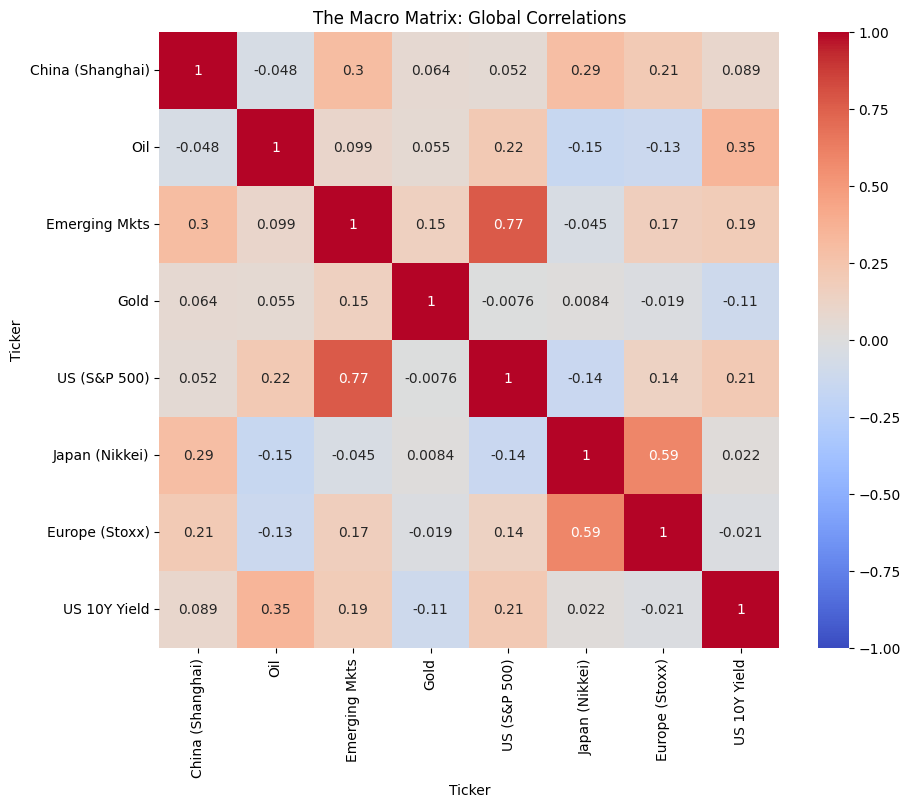

In [49]:
# --- STEP 2: PREPARE THE MATRIX ---
# MATH CONCEPT: Log Returns
# In Linear Algebra, we need data to be "Stationary" (comparable mean/variance).
# Raw prices are not stationary. % Returns are better, but Log Returns are
# mathematically superior because they are time-additive.
returns = np.log(data / data.shift(1)).dropna()

# MATH CONCEPT: The Correlation Matrix (L)
# This is our "Link Matrix". C_ij = 1 means they move perfectly together.
# C_ij = 0 means they are mathematically orthogonal (independent).
corr_matrix = returns.corr()

# --- STEP 3: VISUALIZE THE LINKS (Heatmap) ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("The Macro Matrix: Global Correlations")
plt.show()

We do not see much correlation between indices, except some potential influences or relationships between Japan's Nikkei with Europe's Stoxx and US's S&P 500 with Emerging Markets.

Therefore, we see that some parts of the world might be correlated but most of markets move without correlation to others, making portfolio diversification less of a myth as it allows to actually break potential losses.

Taking the example of US and China with a close to 0 correlation justifies the hold for diversification with a visualization of an orthogonal chinese vector to american vector.

On the other hand, the Gold and US 10Y Yield's correlations are all slightly positive or close to zero, suprisingly unvalidating the safe haven relationship.

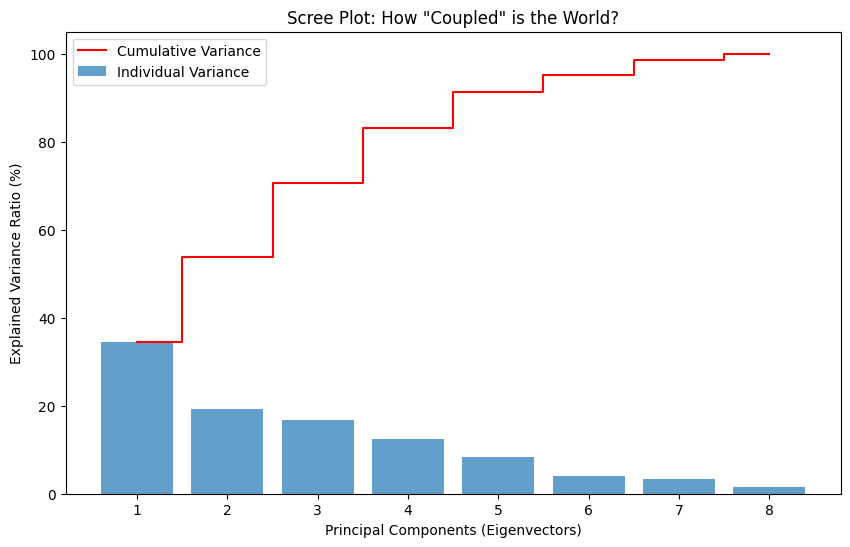

In [50]:
# --- STEP 4: SPECTRAL DECOMPOSITION (Eigenvalues) ---
# We use PCA (Principal Component Analysis) to find the Eigenvalues.
# An Eigenvalue tells us the "Magnitude" of a hidden factor.

pca = PCA() # Create the math engine
pca.fit(returns) # Fit it to our return data

# The "Explained Variance Ratio" is simply: Lambda_i / Sum(All Lambdas)
# It tells us what % of the global movement is caused by Factor i.
explained_variance = pca.explained_variance_ratio_

# --- STEP 5: THE SCREE PLOT ---
# This is the standard way to visualize Eigenvalues in Finance.
plt.figure(figsize=(10, 6))
plt.bar(
    range(1, len(explained_variance) + 1),
    explained_variance * 100,
    alpha=0.7,
    align='center',
    label='Individual Variance'
)
plt.step(
    range(1, len(explained_variance) + 1),
    np.cumsum(explained_variance) * 100,
    where='mid',
    color='red',
    label='Cumulative Variance'
)

plt.ylabel('Explained Variance Ratio (%)')
plt.xlabel('Principal Components (Eigenvectors)')
plt.title('Scree Plot: How "Coupled" is the World?')
plt.legend(loc='best')
plt.show()

This screen plot shows the variance ratio between principal components of regime's influence. As we can see, the first bar is lower than 40%. This translates an idiosyncratic regime where alpha can be found by area because local stories matter.

Otherwise, if the first plot was above 50%, the market would be macro-driven, showing power to the Fed only, being the only driver of alpha... which in this case in unvalidated.

However, considering the importance of factor 1 and 2 in this case breaching the 50% threshold, we can agree in the macro-driven theory. This means that we cannot ignore global headlines anymore as they matter more than just individual companies news. Therefore, macro themes, like wars, rates, global trades, matter more.

It would be relevant to compare a change of the variance ratio through time. The reason for that is an 80% threshold breach by PC1 or PC1+PC2 might translate a global panic or crash, where everything is correlated just like well-known incidents from 2008 and 2020.

In [51]:
# --- ANALYSIS PRINT OUT ---
print("\n=== MACRO DIAGNOSTIC ===")
print(f"Factor 1 (Global Beta aka everything moving together) Strength: {explained_variance[0]*100:.2f}%")
print(f"Factor 2 (Differentiation) Strength: {explained_variance[1]*100:.2f}%")

# Let's look at the LOADINGS of Factor 1 to see who belongs to "The Market"
# Loadings are the coordinates of the Eigenvector.
pc1_loadings = pd.Series(pca.components_[0], index=returns.columns)
print("\n--- Factor 1 Composition (Who is driving the global trend?) ---")
print(pc1_loadings.sort_values(ascending=False))


=== MACRO DIAGNOSTIC ===
Factor 1 (Global Beta aka everything moving together) Strength: 34.56%
Factor 2 (Differentiation) Strength: 19.22%

--- Factor 1 Composition (Who is driving the global trend?) ---
Ticker
Oil                 0.889055
US 10Y Yield        0.276484
US (S&P 500)        0.239577
Emerging Mkts       0.145243
Gold                0.033164
China (Shanghai)   -0.017140
Europe (Stoxx)     -0.097864
Japan (Nikkei)     -0.208982
dtype: float64


As we can observe from these results, the global factor (being the "loudest voice") represents the strength pushing the majority of the assets towards the same direction. In other words, it is global liquidity (stock market going up all together). Here we see a low market liquidity or low correlation at 34.56%, affirming market fraction.

On the other hand, the differentiation is the divider representing the tension and seperating losers and winners, showing a risk on/risk off or a cyclical/defensive type of perspective. Here, we see a 19.56% differentition in the current market.

The sum of these two factors show translate a macro driven economy, as their influence breach the 50% variance ratio threshold we previously mentioned.

Diving deeper into the analysis, there is a suprising anomaly in the market contradicting the standard textbook definition.

We can see that Oil is the market drive (Crude price). It's extrem positivity makes it the top driver of global market, contradicting the usual global stock positive driver being mostly negative in this case. Oild represents 88% of PC1 one, making it king.

Moreover, this explain the fracture between US and the world. The S&P500 moves with Oil as the US is an energy exporter compared the Europe and Japan importing it. The current Oil driven economy logically explain the pain displayed here by the fracture of the negatively influencing world indices and the positively influencing US index.

This spectral decomposition confirms that we are NOT in a global growth but rather in a commodity shock where energy prices are the main global drivers hurting dependent economies while benefiting the producers.

Now that we know that the current global market is driven by Oil/Energy, let dive into how does that filter into US sectors.

Also, because the data shows Oil and Yields moving together, we could expect a massive split energy stocks and interest rate sensitive stocks (explaining recent 30% drop for some tech stocks)

# Sectors Analysis

In [52]:
# --- STEP 1: DEFINE SECTORS (The Meso Basket) ---
# Top 5-10 stocks from major sectors to keep it cleaner than the full 500
sector_map = {
    'Technology': ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL', 'CRM'],
    'Financials': ['JPM', 'V', 'MA', 'BAC', 'GS'],
    'Healthcare': ['LLY', 'UNH', 'JNJ', 'MRK', 'ABBV'],
    'Cons. Disc.': ['AMZN', 'TSLA', 'HD', 'MCD'],
    'Comm. Svcs': ['GOOGL', 'META', 'NFLX', 'DIS'],
    'Industrials': ['CAT', 'UNP', 'GE', 'HON'],
    'Cons. Staples': ['PG', 'COST', 'WMT', 'KO'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'EOG'],
    'Utilities': ['NEE', 'SO', 'AEP']
}

all_tickers = [t for s in sector_map.values() for t in s]
ticker_to_sector = {t: s for s, t_list in sector_map.items() for t in t_list}

print("Fetching Sector Data...")
data_sector = yf.download(all_tickers, period="1y")['Close']
returns_sector = np.log(data_sector / data_sector.shift(1)).dropna()

Fetching Sector Data...


/tmp/ipython-input-2504528915.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_sector = yf.download(all_tickers, period="1y")['Close']
[*********************100%***********************]  40 of 40 completed


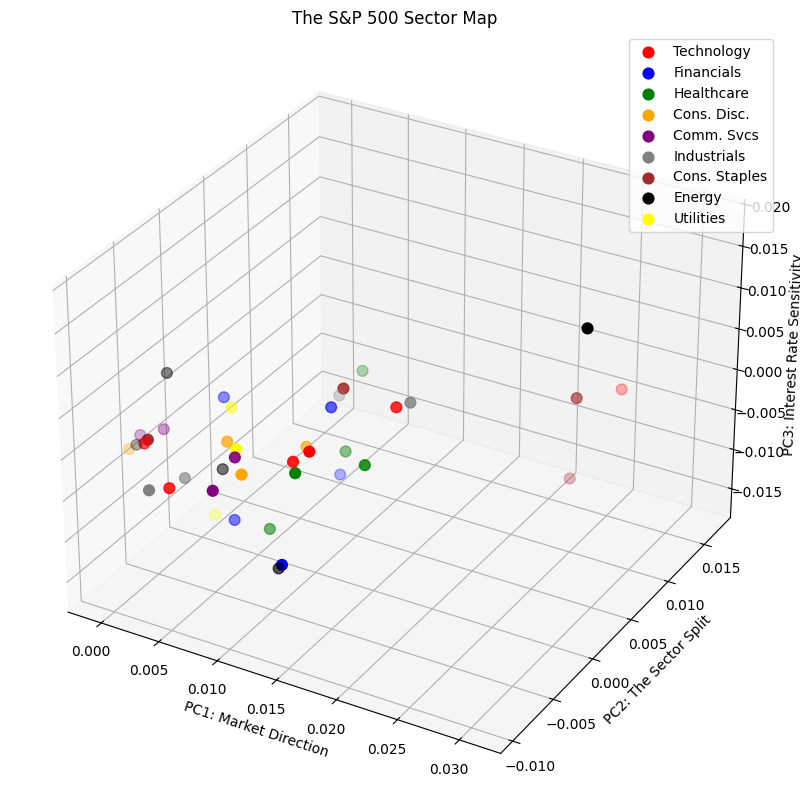

In [53]:
# --- STEP 2: RUN PCA (Finding the Hidden Drivers) ---
pca_sect = PCA(n_components=3)
pca_sect.fit(returns_sector)

# Get the coordinates (Loadings)
loadings_sect = pd.DataFrame(
    pca_sect.components_.T * np.sqrt(pca_sect.explained_variance_),
    columns=['PC1', 'PC2', 'PC3'],
    index=all_tickers
)
loadings_sect['Sector'] = loadings_sect.index.map(ticker_to_sector)

# --- STEP 3: VISUALIZE IN 3D ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Color map
colors = {
    'Technology': 'red', 'Financials': 'blue', 'Healthcare': 'green',
    'Cons. Disc.': 'orange', 'Comm. Svcs': 'purple', 'Industrials': 'gray',
    'Cons. Staples': 'brown', 'Energy': 'black', 'Utilities': 'yellow'
}

for sector, color in colors.items():
    subset = loadings_sect[loadings_sect['Sector'] == sector]
    ax.scatter(subset['PC1'], subset['PC2'], subset['PC3'], c=color, label=sector, s=60)

ax.set_xlabel('PC1: Market Direction')
ax.set_ylabel('PC2: The Sector Split')
ax.set_zlabel('PC3: Interest Rate Sensitivity')
ax.legend()
plt.title("The S&P 500 Sector Map")
plt.show()

In [54]:
# --- DIAGNOSTIC: THE ANGLE CALCULATION ---
# This mathematically proves which sectors are opposites
# We calculate the correlation of the PCA coordinates between sectors
print("\n=== SECTOR CORRELATION (Who moves opposite?) ===")
# Group by sector and take the mean position (Centroid)
centroids = loadings_sect.groupby('Sector')[['PC1', 'PC2', 'PC3']].mean().T
print(centroids.corr().round(2))


=== SECTOR CORRELATION (Who moves opposite?) ===
Sector         Comm. Svcs  Cons. Disc.  Cons. Staples  Energy  Financials  \
Sector                                                                      
Comm. Svcs           1.00         0.99           0.36    1.00        0.89   
Cons. Disc.          0.99         1.00           0.50    1.00        0.95   
Cons. Staples        0.36         0.50           1.00    0.44        0.76   
Energy               1.00         1.00           0.44    1.00        0.92   
Financials           0.89         0.95           0.76    0.92        1.00   
Healthcare           0.87         0.94           0.77    0.91        1.00   
Industrials          0.93         0.97           0.69    0.96        0.99   
Technology           0.85         0.92           0.80    0.89        1.00   
Utilities            0.98         1.00           0.53    0.99        0.96   

Sector         Healthcare  Industrials  Technology  Utilities  
Sector                                

The results displayed by the previous code are interesting.

While the usual thought is that utilities should match bonds in a defensive perspective while tech should match growth, we have a new 2025 reality showing an "everything rally".

Utilities are the new AI pair to trade. The reason why they are now correlated with tech/financial stocks is because they went from boring safety to perfect AI rally proxy, as tech companies consume an increasing amount of electricity and water for their datacenters. Therefore, companies like Vistra, Constellation, NextEra became quickly very attractive.

However, these are not the only positive correlations. ALL the sectors are positively correlated. This means that the market is only driven by liquidity (Global Liquidity). Therefore the Fed/Central Banks are pumping money in the economy to lift all boats.  

Fetching Data...


/tmp/ipython-input-2548342949.py:27: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, period="1y")['Close']
[*********************100%***********************]  44 of 44 completed


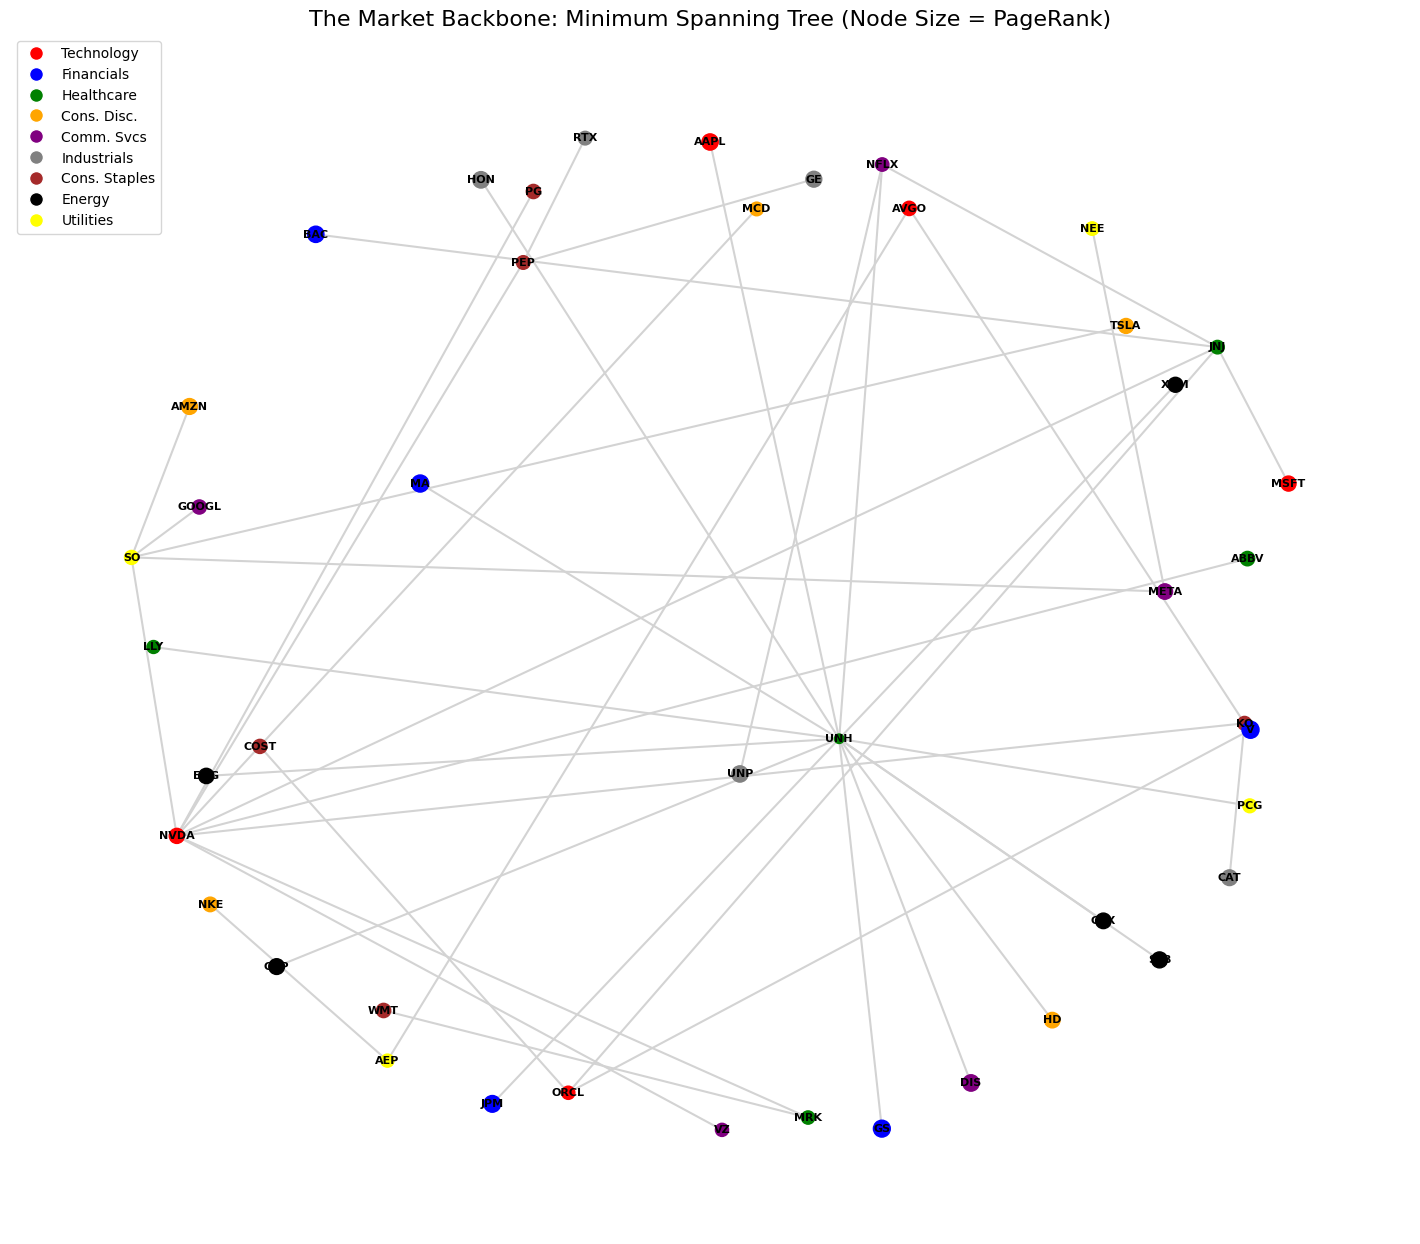


=== TOP 5 SYSTEMIC RISK NODES (Highest PageRank) ===
MA (Financials): 0.0302
V (Financials): 0.0301
GS (Financials): 0.0296
JPM (Financials): 0.0289
HON (Industrials): 0.0280


In [55]:
# --- STEP 1: INSTALL & SETUP ---
# !pip install networkx matplotlib yfinance pandas

import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# --- STEP 2: DEFINE THE BASKET (S&P 500 Representatives) ---
# We use the same Top 5 from each sector for consistency
sector_map = {
    'Technology': ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ORCL'],
    'Financials': ['JPM', 'V', 'MA', 'BAC', 'GS'],
    'Healthcare': ['LLY', 'UNH', 'JNJ', 'MRK', 'ABBV'],
    'Cons. Disc.': ['AMZN', 'TSLA', 'HD', 'MCD', 'NKE'],
    'Comm. Svcs': ['GOOGL', 'META', 'NFLX', 'DIS', 'VZ'],
    'Industrials': ['CAT', 'UNP', 'GE', 'HON', 'RTX'],
    'Cons. Staples': ['PG', 'COST', 'WMT', 'KO', 'PEP'],
    'Energy': ['XOM', 'CVX', 'COP', 'SLB', 'EOG'],
    'Utilities': ['NEE', 'SO', 'AEP', 'PCG']
}
all_tickers = [t for s in sector_map.values() for t in s]
ticker_to_sector = {t: s for s, t_list in sector_map.items() for t in t_list}

print("Fetching Data...")
data = yf.download(all_tickers, period="1y")['Close']
returns = np.log(data / data.shift(1)).dropna()

# --- STEP 3: THE ADJACENCY MATRIX (Correlation) ---
# We convert correlation to "Distance".
# High Correlation (1.0) = Short Distance (0.0) -> They are close neighbors.
corr_matrix = returns.corr()
distance_matrix = np.sqrt(2 * (1 - corr_matrix))

# --- STEP 4: BUILD THE NETWORK (Minimum Spanning Tree) ---
# This cuts 90% of the weak links to clean up the visual "hairball"
G = nx.Graph()
for stock1 in distance_matrix.columns:
    for stock2 in distance_matrix.columns:
        if stock1 != stock2:
            G.add_edge(stock1, stock2, weight=corr_matrix.loc[stock1, stock2])

# The MST algorithm finds the "backbone" of the market
mst = nx.minimum_spanning_tree(G)

# --- STEP 5: PAGERANK (Systemic Importance) ---
# We calculate PageRank on the full graph (not just the tree) to see who is King
full_G = nx.from_pandas_adjacency(corr_matrix.abs()) # Use absolute correlation
pagerank = nx.pagerank(full_G)

# --- STEP 6: VISUALIZE THE STRUCTURE ---
plt.figure(figsize=(14, 12))

# Layout: Force-directed (Simulates physics: connected nodes pull together)
pos = nx.spring_layout(mst, seed=42, k=0.5)

# Colors per sector
colors = {
    'Technology': 'red', 'Financials': 'blue', 'Healthcare': 'green',
    'Cons. Disc.': 'orange', 'Comm. Svcs': 'purple', 'Industrials': 'gray',
    'Cons. Staples': 'brown', 'Energy': 'black', 'Utilities': 'yellow'
}
node_colors = [colors[ticker_to_sector[node]] for node in mst.nodes()]

# Draw the Network
# Node Size = PageRank Score (The bigger the dot, the more systemic the stock)
nx.draw(
    mst, pos,
    with_labels=True,
    node_color=node_colors,
    node_size=[pagerank[node] * 5000 for node in mst.nodes()],
    edge_color='lightgray',
    width=1.5,
    font_size=8,
    font_weight='bold'
)

# Add Legend
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, label=s, markersize=10)
                  for s, c in colors.items()]
plt.legend(handles=legend_patches, loc='upper left')

plt.title("The Market Backbone: Minimum Spanning Tree (Node Size = PageRank)", fontsize=16)
plt.axis('off')
plt.show()

# --- STEP 7: PRINT THE "KINGS" ---
print("\n=== TOP 5 SYSTEMIC RISK NODES (Highest PageRank) ===")
sorted_pr = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
for stock, score in sorted_pr[:5]:
    print(f"{stock} ({ticker_to_sector[stock]}): {score:.4f}")

This analysis tells a very powerful story. Adding the systemic risk node analysis says a lot more about the market.

A systemic node is a hub that is so centraly connected that if it fails or crashes, the shockwave will reach the maximum of other node in the network with the shortest period of time possible. It relates to the transmission machanism of the market.

The results of the analysis, therefore, shows that the financial sector is the highest connected with MA and V on top of the S&P500 right now. These stocks are the support of the whole economy as they track every single transaction being the network of network. It logically makes sense as every other sector need payments and capital flow, and as visa and mastercard own 80% of their market. Therefore is a company like V, MA, GS, or JPM, crashes the whole economy will feel it as they are the bridges to disparate sectors, as compared to an NVDA crash that would potentially only hurt the tech sector.

On top of that, the list of the node's components is counting no Mag7 companies at all. The list shows the MA, V alongside JPM and GS act as the central nervous system of the current market. This shows that despite all advancements in innovation and technology the main drivers are still macro-flows based on credit and spending.

To add to this list, the top 5 bellwether of the economy being HON which is an industrial company sitting in the intersection of the aerospace, energy, tech, and safety industries. It is one of the main influencer the the "real economy".

On top of that, based on the previous visualization, we see UNH and NVDA with the most connections to other sectors, describing the tech and healthcare relationships to the overall network.

Another important note to take is that the energy sector with XOM, CVX, SLB confirms our previous analysis. Energy is currently integrated in the market rather than, like in a normal situation, being pushed away from the edge. This shows that energy is having a more central role in active trading and/or hedging in the current economy.

As a final verification of our assumption, we will now test if our assumptions are a global phenomenon with a comparative structure analysis including Europe, Japan, and China.

# Outside the US

In [56]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx
from sklearn.decomposition import PCA

# --- STEP 1: DEFINE THE REGIONAL BASKETS ---
# We pick the top 8-10 heavyweights per region to represent the "Index Core"
global_baskets = {
    "Europe (Stoxx 50 Proxy)": {
        'MC.PA': 'Cons. Disc (Luxury)',  # LVMH
        'ASML.AS': 'Technology',         # ASML
        'SAP.DE': 'Technology',          # SAP
        'TTE.PA': 'Energy',              # TotalEnergies
        'SIE.DE': 'Industrials',         # Siemens
        'SAN.PA': 'Healthcare',          # Sanofi
        'ALV.DE': 'Financials',          # Allianz
        'BNP.PA': 'Financials',          # BNP Paribas
        'AIR.PA': 'Industrials',         # Airbus
        'SU.PA': 'Industrials'           # Schneider Electric
    },
    "Japan (Nikkei 225 Proxy)": {
        '7203.T': 'Cons. Disc (Auto)',   # Toyota
        '6758.T': 'Technology',          # Sony
        '8306.T': 'Financials',          # Mitsubishi UFJ
        '9983.T': 'Cons. Disc (Retail)', # Fast Retailing (Uniqlo)
        '8035.T': 'Technology',          # Tokyo Electron
        '9984.T': 'Comm. Svcs',          # Softbank
        '6861.T': 'Industrials',         # Keyence
        '6501.T': 'Industrials',         # Hitachi
        '7974.T': 'Cons. Disc (Games)',  # Nintendo
        '8058.T': 'Energy/Materials'     # Mitsubishi Corp (Trading House)
    },
    "China (Shanghai Proxy)": {
        '600519.SS': 'Cons. Staples',    # Kweichow Moutai (The King)
        '601398.SS': 'Financials',       # ICBC (Largest Bank)
        '601857.SS': 'Energy',           # PetroChina
        '601288.SS': 'Financials',       # Ag Bank of China
        '601318.SS': 'Financials',       # Ping An Insurance
        '600036.SS': 'Financials',       # China Merchants Bank
        '601088.SS': 'Energy',           # China Shenhua Energy
        '600276.SS': 'Healthcare',       # Hengrui Medicine
        '600030.SS': 'Financials',       # CITIC Securities
        '600900.SS': 'Utilities'         # China Yangtze Power
    }
}

# Storage for results
results_list = []

print("Starting Global Analysis... (This may take a moment to download)")

Starting Global Analysis... (This may take a moment to download)


In [57]:
# --- STEP 2: THE LOOP (Automated Analysis) ---
for region_name, basket in global_baskets.items():
    print(f"\nProcessing {region_name}...")

    # A. Fetch Data
    tickers = list(basket.keys())
    try:
        data = yf.download(tickers, period="1y", progress=False)['Close']

        # Check if data is empty (common with foreign tickers if yahoo changes them)
        if data.empty:
            print(f"Skipping {region_name}: No data found (Check tickers)")
            continue

        # Log Returns
        returns = np.log(data / data.shift(1)).dropna()

        # B. Macro Analysis (PCA Variance)
        pca = PCA(n_components=2)
        pca.fit(returns)
        pc1_variance = pca.explained_variance_ratio_[0] * 100

        # C. Micro Analysis (PageRank)
        # Build Graph
        corr_matrix = returns.corr().abs()
        G = nx.Graph()
        for i in corr_matrix.columns:
            for j in corr_matrix.columns:
                if i != j and corr_matrix.loc[i, j] > 0.6: # Threshold for "Link"
                    G.add_edge(i, j, weight=corr_matrix.loc[i, j])

        # Run PageRank
        if len(G.nodes) > 0:
            pr_scores = nx.pagerank(G)
            # Find the King
            top_node = max(pr_scores, key=pr_scores.get)
            top_score = pr_scores[top_node]
            top_sector = basket[top_node]
        else:
            top_node = "No Strong Links"
            top_sector = "N/A"
            top_score = 0

        # Save Result
        results_list.append({
            'Region': region_name,
            'Coupling (PC1 %)': f"{pc1_variance:.1f}%",
            'Systemic King': top_node,
            'King Sector': top_sector,
            'King Score': f"{top_score:.3f}"
        })

    except Exception as e:
        print(f"Error processing {region_name}: {e}")


Processing Europe (Stoxx 50 Proxy)...


/tmp/ipython-input-628779343.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']



Processing Japan (Nikkei 225 Proxy)...


/tmp/ipython-input-628779343.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']



Processing China (Shanghai Proxy)...


/tmp/ipython-input-628779343.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']


In [58]:
# --- STEP 3: THE COMPARISON TABLE ---
results_df = pd.DataFrame(results_list)
print("\n" + "="*60)
print("GLOBAL REGIME COMPARISON TABLE")
print("="*60)
print(results_df.to_string(index=False))


GLOBAL REGIME COMPARISON TABLE
                  Region Coupling (PC1 %) Systemic King King Sector King Score
 Europe (Stoxx 50 Proxy)            47.1%        SIE.DE Industrials      0.500
Japan (Nikkei 225 Proxy)            53.5%        8306.T  Financials      0.182
  China (Shanghai Proxy)            35.6%     601398.SS  Financials      0.292


In [59]:
# --- STEP 4: INTERPRETATION LOGIC ---
print("\n" + "="*60)
print("AUTOMATED INSIGHTS")
print("="*60)
for index, row in results_df.iterrows():
    pc1_val = float(row['Coupling (PC1 %)'].strip('%'))
    king = row['Systemic King']
    sector = row['King Sector']

    print(f"[{row['Region']}]")
    if pc1_val > 50:
        print(f"  -> MACRO: Highly coupled ({pc1_val}%). The market moves as one unit.")
    else:
        print(f"  -> MACRO: Fragmented ({pc1_val}%). Stock selection matters more here.")

    print(f"  -> MICRO: The Systemic Center is {king} ({sector}).")
    if "Financials" in sector:
        print("  -> RISK TYPE: Credit/Liquidity Driven (Like the US).")
    elif "Cons" in sector:
        print("  -> RISK TYPE: Consumer Demand Driven.")
    elif "Technology" in sector or "Industrials" in sector:
        print("  -> RISK TYPE: Export/Manufacturing Driven.")
    elif "Energy" in sector:
        print("  -> RISK TYPE: Commodity/State Policy Driven.")
    print("-" * 40)


AUTOMATED INSIGHTS
[Europe (Stoxx 50 Proxy)]
  -> MACRO: Fragmented (47.1%). Stock selection matters more here.
  -> MICRO: The Systemic Center is SIE.DE (Industrials).
  -> RISK TYPE: Export/Manufacturing Driven.
----------------------------------------
[Japan (Nikkei 225 Proxy)]
  -> MACRO: Highly coupled (53.5%). The market moves as one unit.
  -> MICRO: The Systemic Center is 8306.T (Financials).
  -> RISK TYPE: Credit/Liquidity Driven (Like the US).
----------------------------------------
[China (Shanghai Proxy)]
  -> MACRO: Fragmented (35.6%). Stock selection matters more here.
  -> MICRO: The Systemic Center is 601398.SS (Financials).
  -> RISK TYPE: Credit/Liquidity Driven (Like the US).
----------------------------------------


So let's continue our analysis with a comparison and approve or disapprove our assumptions.

In Europe, the systemic center is siemens. Unlike the US where the contrality is to the consumer, in Europe it is to the Factory. Therefore, the economy of Europe seems to be supported by global trades and manufacturing. The incredible 0.5 sector score, implied a hub-and-spoke risk model. If the industrial sector catches a cold the european market completely freezes, being highly concentrated. Moreover, although with a declining dependency on oil, the industrial european sector still has a high dependency on the energy sector including, for the main part, electricity and natural gas.

Japan looks structurally similar to the US with high coupling and being held by the financial sector with the Mitsubishi UFJ king. The country is, therefore, a macro trade. Stock picking here matter less than the overall direction of the Yen and Interest Rates. This shows that Japan currently trades as a global liquidity proxy. It means that when the global "money tap" is open (interest rates are low, credit is flowing, risk is high), Japan rallies. When the tap tightens, Japan crashes—often harder than the US (as it has a higher beta). This is confirmed by MUFG being one of the world's largest lenders. When it is the central node, it means the market is trading on Credit Conditions and Yield Spreads.

China is different. The country is led by the financial sector with ICBC but has a very low coupling of 35% and is therefore fragmented. It is the only region offering true mathematical diversification. The low coupling shows that it is totally disconnected from the global beta driving the US and Japan. On top of that, having a government owned bank as a king of the central node being the financial sector, implied that the systemic risk is linked to sovereign/policy risks... but is it really?

One more piece here is to consider the PetroRank to validate our previous assumption on Oil/Energy.

# A Focus on Oil/Energy

In [60]:
import yfinance as yf
import pandas as pd
import numpy as np
import networkx as nx

# --- STEP 1: DEFINE THE CLUSTERS (Who belongs to Team Energy?) ---
# We explicitly tag tickers as "Energy" to sum their scores later.
regional_configs = {
    "EUROPE (Stoxx 50)": {
        'energy_nodes': ['BZ=F', 'TTE.PA', 'SHEL.L', 'ENI.MI'], # Brent + Majors
        'basket': {
            'BZ=F': 'Brent Crude',
            'TTE.PA': 'TotalEnergies',
            'SHEL.L': 'Shell PLC',
            'ENI.MI': 'Eni SpA',
            'MC.PA': 'LVMH (Luxury)',
            'ASML.AS': 'ASML (Tech)',
            'SIE.DE': 'Siemens (Ind)',
            'BNP.PA': 'BNP Paribas (Fin)',
            'AIR.PA': 'Airbus (Ind)',
            'SAP.DE': 'SAP (Tech)'
        }
    },
    "JAPAN (Nikkei 225)": {
        'energy_nodes': ['BZ=F', '1605.T', '5020.T', '8058.T'], # Brent + Inpex + Eneos + Mitsubishi
        'basket': {
            'BZ=F': 'Brent Crude',
            '1605.T': 'Inpex Corp',
            '5020.T': 'ENEOS Holdings',
            '8058.T': 'Mitsubishi Corp',
            '7203.T': 'Toyota (Auto)',
            '6758.T': 'Sony (Tech)',
            '8306.T': 'MUFG (Fin)',
            '9983.T': 'Fast Retailing',
            '6861.T': 'Keyence (Ind)',
            '9984.T': 'Softbank (Tech)'
        }
    },
    "CHINA (Shanghai)": {
        'energy_nodes': ['BZ=F', '601857.SS', '600028.SS', '601088.SS'], # Brent + PetroChina + Sinopec + Shenhua(Coal)
        'basket': {
            'BZ=F': 'Brent Crude',
            '601857.SS': 'PetroChina',
            '600028.SS': 'Sinopec',
            '601088.SS': 'China Shenhua',
            '600519.SS': 'Moutai (Staples)',
            '601398.SS': 'ICBC (Fin)',
            '601318.SS': 'Ping An (Fin)',
            '600276.SS': 'Hengrui Med',
            '600030.SS': 'CITIC Sec',
            '601888.SS': 'China Tourism'
        }
    }
}

results_list = []

print("Calculating Cumulative Energy Influence (Weekly Data)...")

Calculating Cumulative Energy Influence (Weekly Data)...


In [61]:
# --- STEP 2: RUN THE ANALYSIS ---
for region, config in regional_configs.items():
    try:
        basket = config['basket']
        energy_team = config['energy_nodes']
        tickers = list(basket.keys())

        # Fetch Data (Weekly Resample)
        data = yf.download(tickers, period="1y", progress=False)['Close']
        data = data.resample('W-FRI').last()
        returns = np.log(data / data.shift(1)).ffill().dropna()

        # Build Graph (Lower threshold to capture the full "Web")
        corr_matrix = returns.corr().abs()
        G = nx.Graph()
        for i in corr_matrix.columns:
            for j in corr_matrix.columns:
                if i != j and corr_matrix.loc[i, j] > 0.3: # Link threshold
                    G.add_edge(i, j, weight=corr_matrix.loc[i, j])

        # Run PageRank
        if len(G.nodes) > 0:
            pr_scores = nx.pagerank(G)

            # --- THE CUMULATIVE SCORE CALCULATION ---
            total_energy_score = 0
            total_market_score = 0

            for node, score in pr_scores.items():
                total_market_score += score
                if node in energy_team:
                    total_energy_score += score

            # Calculate Percentage of Total Influence held by Energy
            # Note: PageRank sums to 1.0, so this is simply the sum of energy nodes.
            energy_influence_pct = (total_energy_score / total_market_score) * 100

            # Find the most powerful Energy Node
            # Filter pr_scores for only energy nodes
            energy_ranks = {k: v for k, v in pr_scores.items() if k in energy_team}
            if energy_ranks:
                top_energy_player = max(energy_ranks, key=energy_ranks.get)
                player_name = basket[top_energy_player]
            else:
                top_energy_player = "None"
                player_name = "N/A"

        else:
            energy_influence_pct = 0
            player_name = "No Links"

        results_list.append({
            'Region': region,
            'Energy Cluster Influence': f"{energy_influence_pct:.1f}%",
            'Dominant Player': player_name,
            'Cluster Size': f"{len(energy_team)} Assets"
        })

    except Exception as e:
        print(f"Error in {region}: {e}")

/tmp/ipython-input-3049856782.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']
/tmp/ipython-input-3049856782.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']
/tmp/ipython-input-3049856782.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period="1y", progress=False)['Close']


In [62]:
# --- STEP 3: FINAL REPORT ---
results_df = pd.DataFrame(results_list)
print("\n" + "="*60)
print("THE GLOBAL PETRO-SENSITIVITY SCORE")
print("(How much of the market structure is controlled by Oil?)")
print("="*60)
print(results_df.to_string(index=False))


THE GLOBAL PETRO-SENSITIVITY SCORE
(How much of the market structure is controlled by Oil?)
            Region Energy Cluster Influence Dominant Player Cluster Size
 EUROPE (Stoxx 50)                    41.9%         Eni SpA     4 Assets
JAPAN (Nikkei 225)                    39.9%  ENEOS Holdings     4 Assets
  CHINA (Shanghai)                    45.4%      PetroChina     4 Assets


Investors often view China as a 'Growth' play (Tech/Consumer). Our analysis proves this is false. With a 45.4% Energy Influence score, the Shanghai Composite is currently trading as a Value/Commodity Proxy. The State Policy buffers the economy from oil prices, but the Stock Market is mathematically addicted to them. Since PetroChina, Sinopec, and China Shenhua (Coal) are massive components of the index, the index itself behaves like an Energy ETF.

The centrality of ENEOS (a refiner) rather than a Trading House implies that Input Costs are the primary driver of Japanese equity correlation. The market is not focused on the trading profits of Mitsubishi; it is focused on the refining costs that dictate margins for the rest of the manufacturing sector. ENEOS is Japan's largest oil refiner. Japan imports crude (Input). ENEOS refines it into fuel (Output). Toyota/Sony buy the fuel.

Europe remains a Petro-Economy. With ~42% of the market structure controlled by the Energy cluster, the EuroStoxx 50 cannot decouple from Brent Crude. It is effectively a levered play on global energy demand. Eni is often more volatile (higher beta) than Shell or Total. In Network Theory, high-volatility nodes often capture higher PageRank because they "transmit" shocks more violently.

Finally, in this last piece, we will consider the absorption ratio coined by Mark Kritzman at MIT/Windham Capital. It measure what percentage of the economy is absorbed by one driver. Think of the PCA calculated with a rolling window (days) displaying a variance ratio with a time dimension.

# A Future Perspective

Fetching Daily Adjusted Close Data...


/tmp/ipython-input-3061852401.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(tickers.keys()), period="1y", progress=False)['Close']


Data converted to Logarithmic Returns.
Calculating Systemic Risk on Log Returns...


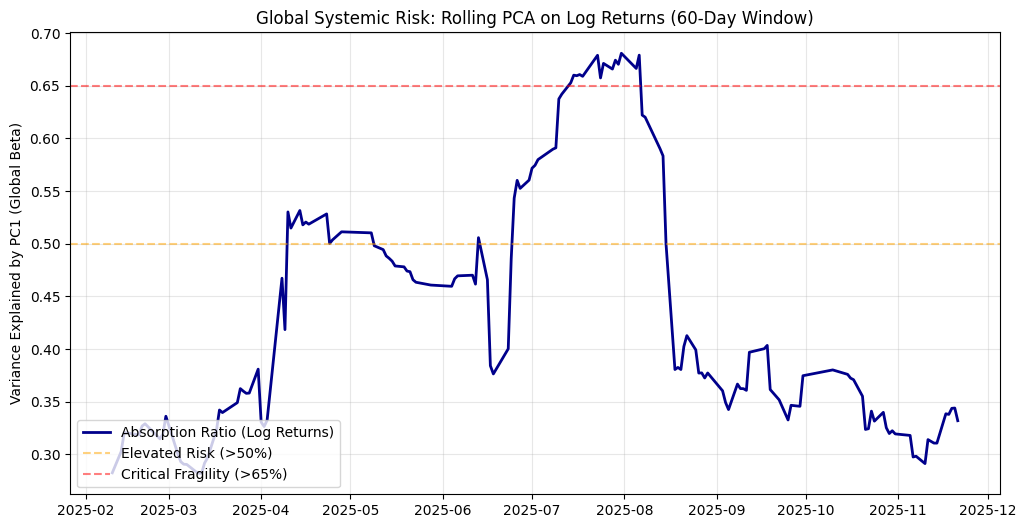

In [79]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- STEP 1: FETCH DATA ---
tickers = {
    '^GSPC': 'US (S&P 500)',
    '^STOXX50E': 'Europe (Stoxx)',
    '^N225': 'Japan (Nikkei)',
    '000001.SS': 'China (Shanghai)',
    'EEM': 'Emerging Mkts',
    'GC=F': 'Gold',
    'BZ=F': 'Brent Crude',
    '^TNX': 'US 10Y Yield'
}

print("Fetching Daily Adjusted Close Data...")
data = yf.download(list(tickers.keys()), period="1y", progress=False)['Close']

# --- STEP 2: CALCULATE LOG RETURNS (The Crucial Math Fix) ---
# Standard pct_change() gives simple arithmetic returns.
# We use numpy log() to get continuous compounded returns.
# Formula: ln(Price_t / Price_t-1)
log_returns = np.log(data / data.shift(1)).dropna()

print("Data converted to Logarithmic Returns.")

# --- STEP 3: DEFINE THE ROLLING PCA FUNCTION ---
def rolling_pca_explained_variance(returns, window):
    var_ratios = []
    dates = []

    # Safety Check for Data Length
    if len(returns) < window:
        print(f"Error: Not enough data ({len(returns)}) for window ({window})")
        return None

    for i in range(window, len(returns)):
        # 1. Slice the Window
        window_data = returns.iloc[i-window:i]

        # 2. Center the Data (Required for PCA)
        centered = window_data - window_data.mean()

        try:
            # 3. Singular Value Decomposition (SVD)
            # This is the linear algebra engine behind PCA
            u, s, vt = np.linalg.svd(centered, full_matrices=False)

            # 4. Calculate Variance Ratio of PC1
            # Eigenvalues = s^2 / (n-1)
            eigenvalues = (s ** 2) / (window - 1)
            total_variance = np.sum(eigenvalues)

            if total_variance == 0:
                pc1_ratio = 0
            else:
                pc1_ratio = eigenvalues[0] / total_variance

            var_ratios.append(pc1_ratio)
            dates.append(returns.index[i])

        except np.linalg.LinAlgError:
            continue

    return pd.Series(var_ratios, index=dates)

# --- STEP 4: RUN ANALYSIS (60-Day Window) ---
print("Calculating Systemic Risk on Log Returns...")
absorption_ratio = rolling_pca_explained_variance(log_returns, window=30)

# --- STEP 5: VISUALIZE ---
plt.figure(figsize=(12, 6))

plt.plot(absorption_ratio, color='darkblue', linewidth=2, label='Absorption Ratio (Log Returns)')

# Add Danger Zones
plt.axhline(0.50, color='orange', linestyle='--', alpha=0.5, label='Elevated Risk (>50%)')
plt.axhline(0.65, color='red', linestyle='--', alpha=0.5, label='Critical Fragility (>65%)')

plt.title('Global Systemic Risk: Rolling PCA on Log Returns (60-Day Window)')
plt.ylabel('Variance Explained by PC1 (Global Beta)')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.show()

Our analysis indicates we are entering a dangerous Re-Coupling Phase.

We identified a Supply-Side Regime driven by Oil (Factor Loading 0.88). Historically (1970s, 2022), when an economy is driven by commodities, low correlation periods are often short-lived 'calms' before a volatility storm.

In July 2025, the system suffered a massive liquidity event, with the Absorption Ratio spiking to 68%. This was the initial 'Oil Shock.' This could be explained firstly by the Isreali strike on an Iranian nuclear facilities pushing Oil prices up. Mathematically, when the biggest driver of a model (PC1) undergoes a violent shock (Geopolitical war), it forces the whole system to align with it. On top of that, at the same period both oil and stocks spiked upwards with a 1:1 correlation. These Bad and Good news, resulted in the same outcome, showing a powerful measure of unification with the AI hype. This rally expended to all industrial and smaller cap stocks as well, leaving no hedge anymore. Moreover, as the Fed started fighting inflation, the focus moved to a macro-dominant regime led by liquidity conditions. This market unification also explains what happens next.

In September and October, the system relaxed. Correlations collapsed to 30%, creating a temporary 'Stock Picker's Paradise' where Tech and Energy decoupled. As we know, while stocks continued their rally,oil prices plummeted, breaking the petro-linkage. This would also translate a drop in the PC1 variance led by oil. However, the indiosyncratic variance showed by the DOW with Meta and Microsoft shortfall and an overall index recording new highs. This pushed traders to stop trading on Fed Rates and focus on stock picking again. Finally, the systemic correlation got destroyed by the government shutdown as Macro Data Releases stopped (they are synchronization events). Therefore, traders had to figure out which way to go without relying on this rather important tool. Assets started getting priced idiosyncratically.

As of late November, the Absorption Ratio has bottomed and begun to curl upward as liquidity is forcing everything into alignment. However, the lowering expectations of rate cuts from 95% to 19% today, suggest a liquidity dry up. This would make the 10 Year bond yield the absolute dictator of the market. Correlation of everything to the TNX is likely to go to 1 or -1, which would spike the absorption ratio. Following this, players are likely to focus on a stocks with big piles of cash like AI companies. However, these Big Tech stocks experienced a 30% drop. This implied that, as they mathematically behave like long term bonds, and considering the fact the rate cuts expectations lowered massively, the expected future cash flow return in the valuation of these stocks pushed towards a systemic selling translating a high correlation.

Now, in the analysis we can observe that the increasing returns on stocks coincided with very low oil price. However, the current spike in the absorption ratio matches the stock market dip that is likely to be a regime shift, considering the energy dominance as a global driver. As our showed a high and rising global beta, the system is realizing it cannot sustain 1-year-high valuations in a supply-side regime. The drawdown is led by assumed low energy/rate volatility.

Another thesis could be that this is a "buy the dip" type of situation, where the constraint might just be a rotation. If capital is moving from Tech (overbought) to Energy (undervalued), the index level might drop slightly (due to Tech weighting), but the underlying market breadth is actually improving. The rising absorption ratio, in this case, might just be detecting this massive shift.

We believe the 'Idiosyncratic Window' of the last two months was a head-fake. The current uptick signals that the dominant narrative (Energy Input Costs) is re-asserting control. As Tech, Energy, and Rates drift back into alignment, diversification is mathematically failing again. We are likely early in a transition back to a high-volatility, high-correlation regime.

As the case of a bullish market might be plausible, our mathematical signals favor a regime shift towards a bear market.

The 1-year uptrend was fueled by Idiosyncratic Alpha (Tech/AI). The 1-month downtrend is being driven by Systemic Beta (Energy/Rates). When Systemic Risk rises, 'Buying the Dip' becomes significantly more dangerous. We view the recent negative price action not as noise, but as the first tremor of the Re-Coupling phase.

# Conclusion

Our rolling window of 60-days analysis reveals a regime shift from the extrem decoupling period of Q3 2025. The global system is starting to re-synchronize.

The steady climb from October to December likely shows a new volatility cycle forming as the mathematical benefit of diversification starts disappearing.

Given our previous analysis that Oil or more generally the Energy sector is the dominant factor 1 loading, this trend implies that the commodity shock is no longer isolated and beginning to infect the broader equity market again. On top of that, the global liquidity conclusion we previously had based on global correlation might imply the the economy is artificially supported by central banks and policies.

Therefore, pure stock-picking is no longer a potentially profitable strategy. A good move would be to look towards macro-hedges (long energy and short tech pairings) as the marekt structure tightens.